<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Malm24/blob/main/Semana_7_Data_Analysis_with_Python_(IBM)_A01113135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Semana 7: Data Analysis with Python (IBM)
Marco Antonio López Millán A01113135
Ciencia y analítica de datos (Gpo 10)
01/11/2022**

Modelo - ecuacion matematica utilizada para predecir una valor por medio de otros.

A mayor informacion relevante > mejor sera la prediccion de tu Modelo

Regresion lineal simple > relación entre dos variables "X" y "y" utilzando una pendiente y el intercepto con el eje.



In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
archivo = "/content/automobileEDA.csv" #importando archivo
df =pd.read_csv(archivo) #creando df

In [ ]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
lm = LinearRegression() #creando el objeto Linear regression

In [ ]:
X =df[["highway-mpg"]] #definiendo variables
Y=df["price"]

In [ ]:
lm.fit(X,Y) #fit regresion lineal

LinearRegression()

In [ ]:
Yhat=lm.predict(X) #realizando predicciones

In [ ]:
Yhat[0:5] #observar los primeros cinco resultados

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
lm.intercept_ #obteniendo el intercepto

38423.3058581574

In [ ]:
lm.coef_ #obteniendo coeficiente

array([-821.73337832])

## Función
## Precio = 38423.31 - 821.73 x highway-mp

In [ ]:
lm1 =LinearRegression() #creando regresion lineal

In [ ]:
X2 =df[["engine-size"]] #definiendo variables
Y2=df["price"]

In [ ]:
lm1.fit(X2,Y2)

LinearRegression()

In [ ]:
lm1.coef_

array([166.86001569])

In [ ]:
lm1.intercept_

-7963.338906281042

##Función
##Precio = -7963.34 + 166.86*engine-size

Regresion lineal multiple > relacion entre dos o mas variables con una variable dependiente

In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] #definiendo variables predictoras

In [ ]:
lm.fit(Z, df['price']) # fit modelo lineal

LinearRegression()

In [ ]:
lm.intercept_ #intercepto


-15806.62462632922

In [ ]:
lm.coef_ #coeficientes

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
lm2 = LinearRegression() #nueva regresion

In [ ]:
Z1 = df[['normalized-losses' , 'highway-mpg']] #definiendo variables

In [ ]:
lm2.fit(Z1,df['price']) #fit linear regresion

LinearRegression()

In [ ]:
lm2.coef_ #coeficientes

array([   1.49789586, -820.45434016])

In [ ]:
lm2.intercept_ #intercepto

38201.31327245728

Evaluación de modelo utilizando visualizacion

(0.0, 48175.686356873004)

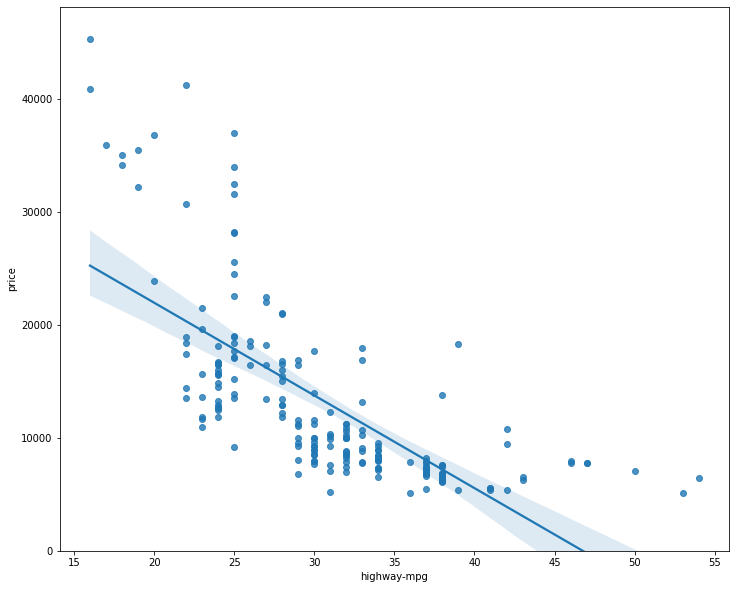

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot (x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

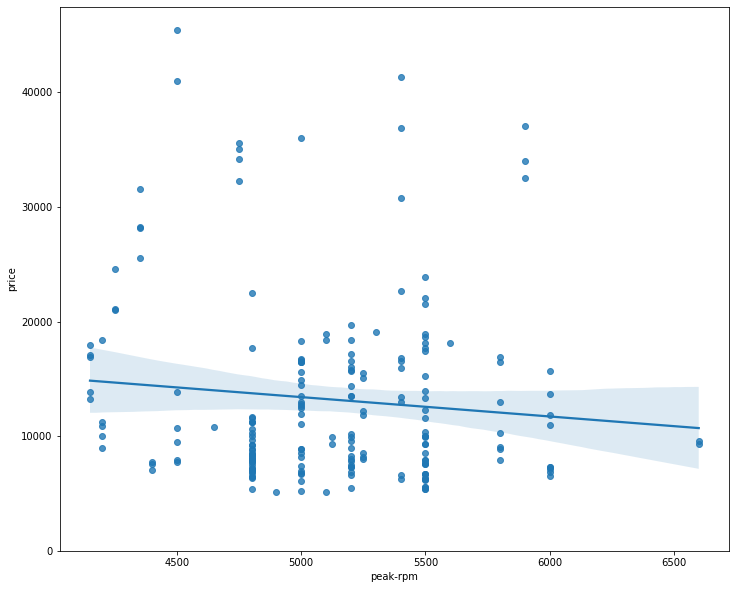

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Si observamos ambas graficas podemos ocncluir  que la grafica de "highway-mpg" se encuentran mas cercanos a la linea mientras que el grafico "peak-rpm" los datos se encuentran mas dipersos y la tendencia no es evidente.

In [ ]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Si calculamos lo indices de correlacion podemos comprobar que "highway-mpg" tiene una relación mas fuerte pues el valor absoluto su se encuentra mas cercano a 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


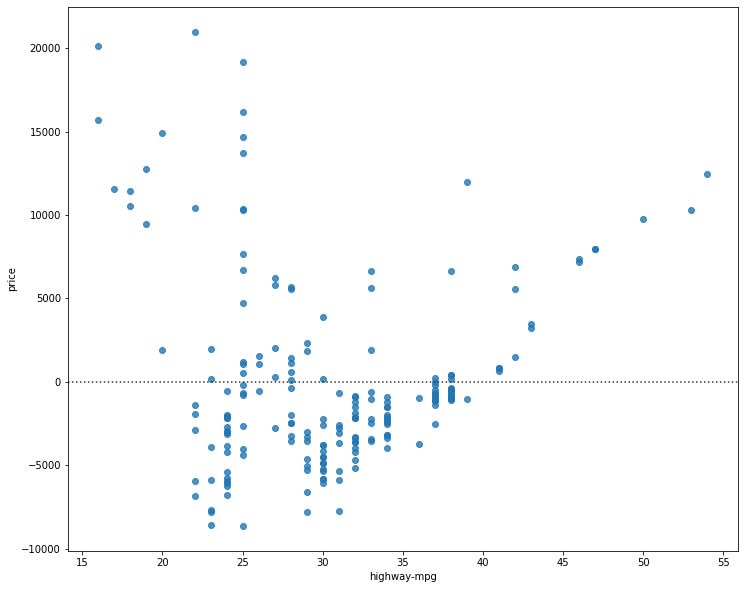

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df["highway-mpg"], df["price"])

Los datos no se encuentran distribuidos de manera aleatoria a lo largo del eje x por ello podemos concluir que tal vez el modelo lineal no es el mas apropiado.

In [ ]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


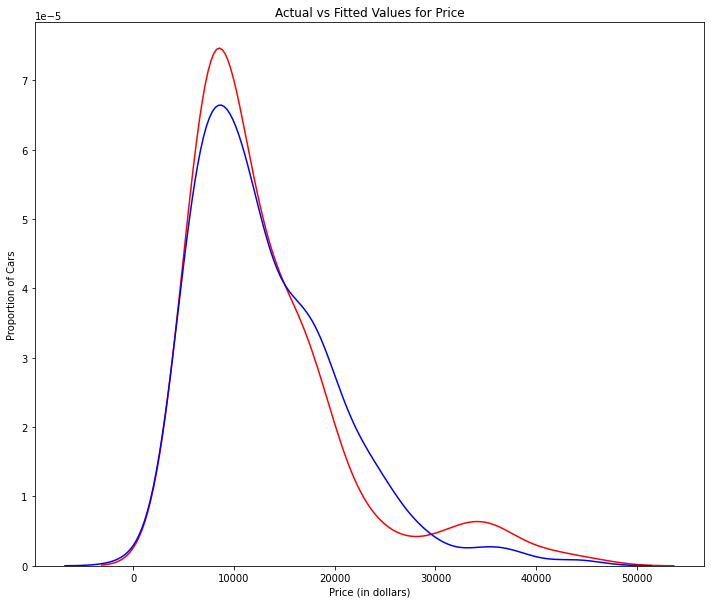

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name): #definiendo función para gráfica
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
x = df['highway-mpg'] #definiendo x
y = df['price'] #definiendo y

In [ ]:
f = np.polyfit(x, y, 3) #uitlizando polinomial de 3er grado
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


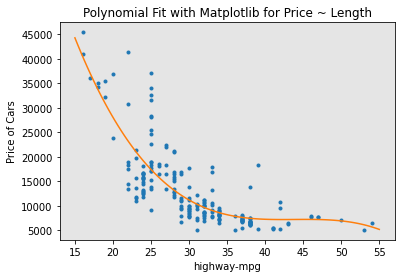

In [ ]:
PlotPolly(p, x, y, 'highway-mpg') #graficando

In [ ]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


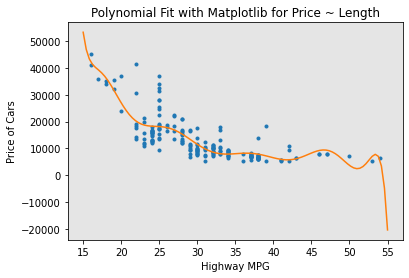

In [ ]:
f1 = np.polyfit(x, y, 11) #poliminal de grado 11
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

In [ ]:
Z_pr.shape

(201, 15)

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())] #creando la lista de argumentos

In [ ]:
pipe=Pipeline(Input) #introduciendo la lista como argumento
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z = Z.astype(float) #convertimos la variable a flotante
pipe.fit(Z,y) #normalizamos, transformamos y corremos el modelo

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe=pipe.predict(Z) #normalizamos, transformamos y realizamos prediccion
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
Input=[('scale',StandardScaler()),('model',LinearRegression())] #creamos nuevo listado para alimentar pipe

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [ ]:
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y)) #consultado rsquare

The R-square is:  0.4965911884339176


Estos nos dice que el 49% de variación del precio puede ser explicado por el modelo

In [ ]:
Yhat=lm.predict(X)
print('La salida de las primera cuatro predicciones es: ', Yhat[0:4])

La salida de las primera cuatro predicciones es:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('El error cuadratico medio es: ', mse)

El error cuadratico medio es:  31635042.944639888


In [ ]:

lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


cerca del 80% de variacion puede ser explicado por la regresion lineal multiple

In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('El error cuadratico medio es: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

El error cuadratico medio es:  11980366.87072649


In [ ]:
r_squared = r2_score(y, p(x))
print('El valor de R-square es: ', r_squared)

El valor de R-square es:  0.674194666390652


In [ ]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
lm.fit(X, Y)
lm

LinearRegression()

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

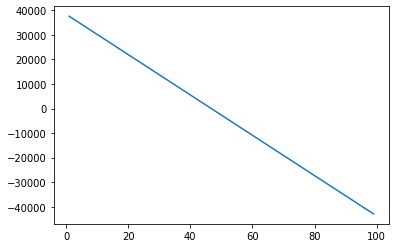

In [ ]:
plt.plot(new_input, yhat)
plt.show()

Regresion polinomial > sirve para describir relaciones curvilineas.

-cuadratico
-cubico
-ordenes mayores




Metricas de evaluacion

Es una manera de medir que tan bien se adecua un modelo al dataset

Error cuadratico medio (MSE)


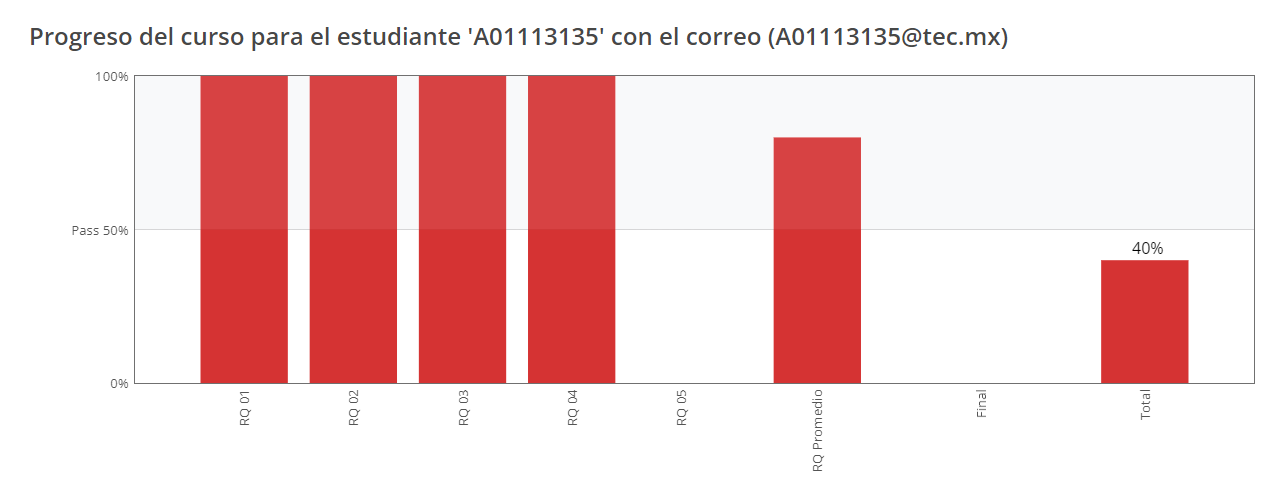[texto del vínculo](https://)